In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
from PIL import Image

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

In [4]:
#from tensorflow.keras.preprocessing import image_dataset_from_directory

In [5]:
from tensorflow.keras.optimizers import Adam, SGD

In [6]:
train_datagen = ImageDataGenerator(
        rotation_range=40,
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

In [7]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [8]:
batch_size = 32

## vet all files can be workable with Tensorflow

In [9]:
# import pandas as pd
# import numpy as np
# df=pd.read_csv('../data/cleaned_data.csv')

In [10]:
# df

In [11]:
# train_datagen.flow_from_dataframe(
# )

In [14]:
train_generator = train_datagen.flow_from_directory(
        '../imgs/train_folder',  # this is the target directory
        target_size=(224, 224),  # all images will be resized to 150x150
        batch_size=batch_size,
        color_mode="rgb",
        class_mode='categorical')  # since we use binary_crossentropy loss, we need binary labels

Found 10254 images belonging to 12 classes.


In [15]:
validation_generator = test_datagen.flow_from_directory(
        '../imgs/validation_folder',
        target_size=(224, 224),
        batch_size=batch_size,
        class_mode='categorical')

Found 1140 images belonging to 12 classes.


In [16]:
steps_per_epoch = 100
epoch  = 50
def my_gen(gen):
    i=0
    while i < steps_per_epoch * epoch:
        try:
            data, labels = next(gen)
            i+=1
            yield data, labels
        except:
            pass

In [17]:
from tensorflow.keras import backend as K
img_width, img_height = 224, 224
if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

In [18]:
# from tensorflow.keras import callbacks
# my_callbacks = [
#     callbacks.EarlyStopping(monitor='loss', mode= 'min', patience=5),
#     callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, verbose=0,
#     min_delta=0.001, cooldown=1, min_lr=0, mode = 'min')
# ]

In [19]:
from tensorflow.keras import callbacks

filepath="../checkpoints/little_model_weights_improvement-{epoch:02d}-{val_accuracy:.2f}.hdf5"

my_callbacks = [
    callbacks.EarlyStopping(monitor='val_loss', min_delta = 0.002, mode= 'min', patience=10),
    callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=4, verbose=0,
    min_delta=0.01, cooldown=1, min_lr=0, mode = 'min'),
    callbacks.ModelCheckpoint(filepath, monitor='val_accuracy', verbose=0, 
                              save_best_only=True, mode='max', save_weights_only = True)
    ]

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(input_shape)))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3), input_shape=(input_shape)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.5))

model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.5))

model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.5))


model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(12))
model.add(Activation('softmax'))

optimizer = SGD(lr=0.005)

model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

In [25]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
activation_4 (Activation)    (None, 148, 148, 32)      0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 146, 146, 32)      9248      
_________________________________________________________________
activation_5 (Activation)    (None, 146, 146, 32)      0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 71, 71, 128)      

In [26]:
hist= model.fit(
        my_gen(train_generator),
        steps_per_epoch=steps_per_epoch,
        epochs=epoch,
        validation_data=validation_generator,callbacks=my_callbacks)

Epoch 1/50
100/100 [==============================] - 154s 2s/step - loss: 2.4897 - accuracy: 0.0731 - val_loss: 2.4842 - val_accuracy: 0.1105 - lr: 0.0050
Epoch 2/50
100/100 [==============================] - 154s 2s/step - loss: 2.4844 - accuracy: 0.0862 - val_loss: 2.4836 - val_accuracy: 0.0974 - lr: 0.0050
Epoch 3/50
100/100 [==============================] - 154s 2s/step - loss: 2.4804 - accuracy: 0.0881 - val_loss: 2.4821 - val_accuracy: 0.0956 - lr: 0.0050
Epoch 4/50
100/100 [==============================] - 153s 2s/step - loss: 2.4728 - accuracy: 0.0962 - val_loss: 2.4794 - val_accuracy: 0.1140 - lr: 0.0050
Epoch 5/50
100/100 [==============================] - 153s 2s/step - loss: 2.4676 - accuracy: 0.1041 - val_loss: 2.4767 - val_accuracy: 0.1439 - lr: 0.0050
Epoch 6/50
100/100 [==============================] - 153s 2s/step - loss: 2.4577 - accuracy: 0.1066 - val_loss: 2.4720 - val_accuracy: 0.1307 - lr: 0.0025
Epoch 7/50
100/100 [==============================] - 153s 2s/st

In [30]:
model.save('../models/little_model.h5')

In [ ]:
# test_loss, test_acc = model.evaluate(X_test_f, y_test_f, verbose=0)

# print('\nTest accuracy {:5.2f}%'.format(100*test_acc))

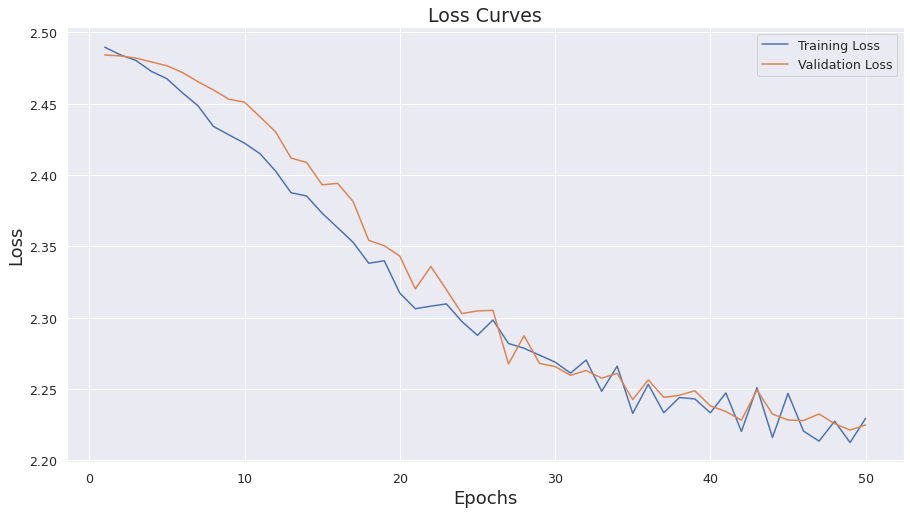

<Figure size 432x288 with 0 Axes>

In [37]:
training_loss = hist.history['loss']
test_loss = hist.history['val_loss']

epoch_count = range(1,len(training_loss)+1)
fig,ax = plt.subplots(figsize=(15,8))

sns.set(font_scale=1.15)
sns.lineplot(x=epoch_count,y=training_loss,ax=ax)
sns.lineplot(x=epoch_count,y=test_loss,ax=ax)

ax.set_title('Loss Curves',fontsize=19)
ax.set_ylabel('Loss',fontsize=18)
ax.set_xlabel('Epochs',fontsize=18)

plt.legend(['Training Loss', 'Validation Loss'])
#plt.xlabel('Epoch')
#plt.ylabel('Loss')
#plt.title('Training and Validation Loss Curves')
plt.show();
plt.savefig('../data/images/little_model.png')

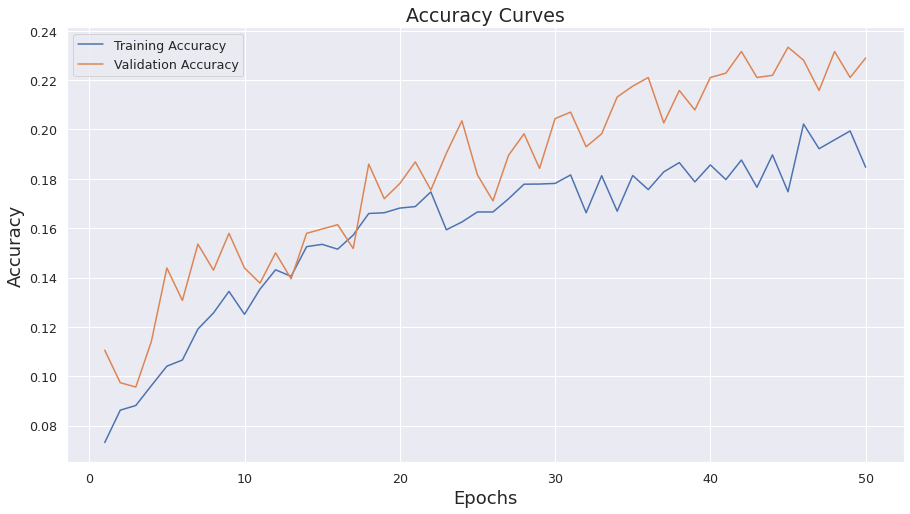

<Figure size 432x288 with 0 Axes>

In [38]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']

epoch_count = range(1,len(training_loss)+1)

fig,ax = plt.subplots(figsize=(15,8))
sns.set(font_scale=1.15)
sns.lineplot(x=epoch_count,y=acc,ax=ax)
sns.lineplot(x=epoch_count,y=val_acc,ax=ax)

ax.set_title('Accuracy Curves',fontsize=19)
ax.set_ylabel('Accuracy',fontsize=18)
ax.set_xlabel('Epochs',fontsize=18)

plt.legend(['Training Accuracy', 'Validation Accuracy'])

# plt.ylabel('Accuracy')
# plt.ylim([min(plt.ylim()),1])
# plt.title('Training and Validation Accuracies')
#plt.xlabel('Epoch')
plt.show();
plt.savefig('../data/images/little_model.png')

In [ ]:
model.evaluate()